# Logistic Regression

When output is modelled as linear combination of features # Linear Reg

log (odds) is modelled as linear combination of features  # Logistic 

output has two possible outcome - survived = 1 or 0

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [126]:
df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv', index_col = 0)

In [127]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

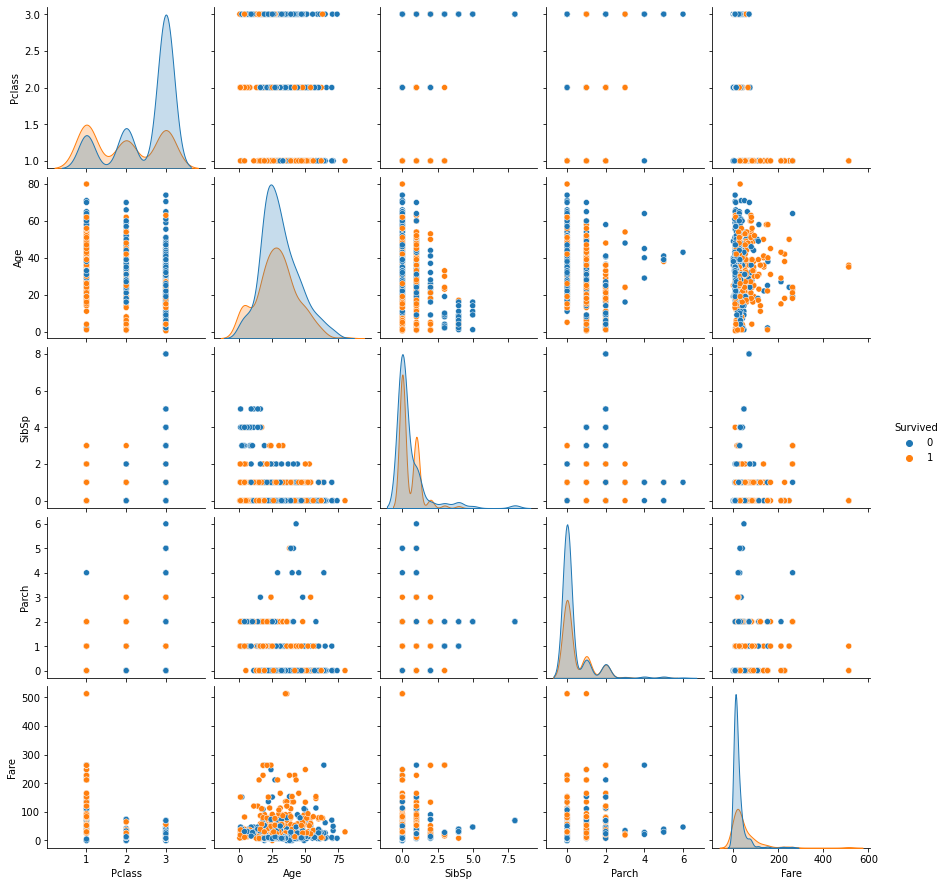

In [129]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Survived' )

In [130]:
corr = df.corr()

In [131]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

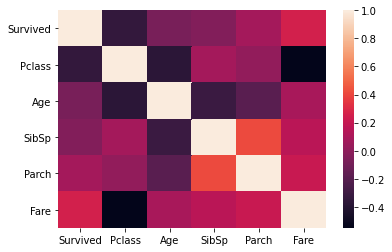

In [132]:
sns.heatmap(corr)

In [133]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Imputing missing values

In [135]:
df.loc[df.Age.isna(),:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [136]:
df.Age.isna().sum()

177

In [137]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [138]:
df['Age'] = df.Age.fillna(28.0)

In [139]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [140]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [141]:
df = df.dropna(subset = ['Embarked'])

In [142]:
df.shape

(889, 11)

In [143]:
df.groupby(['Embarked', 'Survived']).agg({'Name':'count'}).unstack()

Name     
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

In [144]:
import matplotlib.pyplot as plt

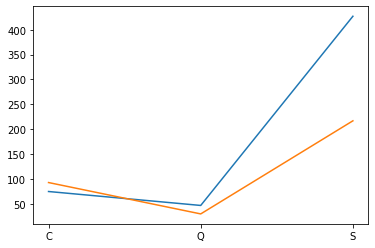

In [145]:
plt.plot(df.groupby(['Embarked', 'Survived']).agg({'Name':'count'}).unstack())

In [146]:
df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,889.000000,889.000000,889,889,889.000000,889.000000,889.000000,889,889.000000,202,889
unique,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,146,3
top,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.382452,2.311586,NaN,NaN,29.315152,0.524184,0.382452,NaN,32.096681,NaN,NaN
std,0.486260,0.834700,NaN,NaN,12.984932,1.103705,0.806761,NaN,49.697504,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [147]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

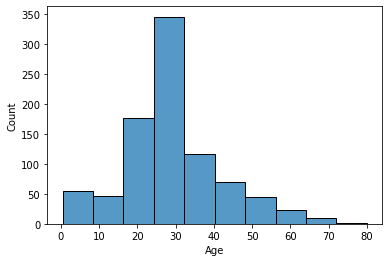

In [148]:
sns.histplot(df.Age,  bins=10)

In [149]:
df.groupby(['Age']).agg({'Age':'mean'})

,Age
Age,
0.42,0.42
0.67,0.67
0.75,0.75
0.83,0.83
0.92,0.92
...,...
70.00,70.00
70.50,70.50
71.00,71.00


In [150]:
df['age_bin'] = pd.cut(df.Age, bins = range(0,80, 10))

<ipython-input-150-bfbb9695bb81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bin'] = pd.cut(df.Age, bins = range(0,80, 10))


In [151]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 30]"
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10, 20]"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(20, 30]"


<AxesSubplot:xlabel='age_bin'>

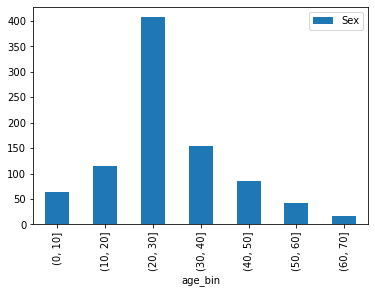

In [152]:
df.groupby(['age_bin']).agg({'Sex':'count'}).plot(kind = 'bar')

<AxesSubplot:xlabel='Age', ylabel='Density'>

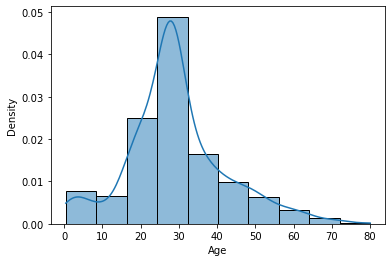

In [153]:
sns.histplot(df.Age,  bins=10, stat = 'density', kde = True)

In [154]:
df.Survived.value_counts(normalize = True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [155]:
odds = 38/62

In [156]:
odds = P/(1-P)

NameError: name 'P' is not defined

In [157]:
log(p/(1-p))= mx + +c

SyntaxError: cannot assign to function call (<ipython-input-157-ef34adc33b24>, line 1)

In [158]:
lhs = log(odds(survived))

NameError: name 'log' is not defined

In [159]:
p/1-p = e**(mx+C)

SyntaxError: cannot assign to operator (<ipython-input-159-3da674ce76b2>, line 1)

In [160]:
p = 1/(1+e**-mx-c)

NameError: name 'e' is not defined

In [161]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [162]:
df.Sex.map({'male':0, 'female':1})

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: Sex, Length: 889, dtype: int64

In [163]:
from sklearn import preprocessing #import
le = preprocessing.LabelEncoder() #instantiate
le.fit(df.Sex) #Fit

LabelEncoder()

In [164]:
le.classes_

array(['female', 'male'], dtype=object)

In [165]:
df['is_male'] =le.transform(df.Sex)

<ipython-input-165-d151d0608d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_male'] =le.transform(df.Sex)


In [166]:
y = mx+c

NameError: name 'mx' is not defined

In [167]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,-0.541585
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,0.127741
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,0.086506
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,-0.116348
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,-0.247508
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,-0.179958
is_male,-0.541585,0.127741,0.086506,-0.116348,-0.247508,-0.179958,1.000000


In [168]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,is_male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",1


In [184]:
s1 = pd.Series(['Rahul','Rahul','Priti','Viraj','Joseph', 'Priti', 'Ankush'])

In [185]:
s1

0     Rahul
1     Rahul
2     Priti
3     Viraj
4    Joseph
5     Priti
6    Ankush
dtype: object

In [190]:
pd.get_dummies(s1, drop_first = True)

,Joseph,Priti,Rahul,Viraj
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,0,0


In [169]:
gender_encoded = pd.get_dummies(df.Sex, drop_first = True,prefix='gender')

In [170]:
embarked_encoded =  pd.get_dummies(df.Embarked, drop_first = True,  prefix='Embarked')

In [179]:
embarked_encoded

,Embarked_Q,Embarked_S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
...,...,...
887,0,1
888,0,1
889,0,1


In [171]:
train_df = pd.concat([df, gender_encoded, embarked_encoded], axis =1)

In [172]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,is_male,gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 30]",1,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10, 20]",0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(20, 30]",0,0,0,1


In [173]:
# label encoder
# one hot encoder

In [174]:
train_df.isna().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
age_bin          5
is_male          0
gender_male      0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [191]:
X = pd.DataFrame(train_df.loc[:,['Pclass','Age','Parch','Fare','gender_male','Embarked_Q','Embarked_S' ]])
y = df.Survived # Step 0

In [192]:
# Logistic Regresssion in SkLearn

In [193]:
X.dtypes

Pclass           int64
Age            float64
Parch            int64
Fare           float64
gender_male      uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [194]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression() # instantiate

logreg.fit(X, y) # fit

logreg.predict(X) #predict

/Users/rahulgarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [196]:
predicted_survived = pd.Series(logreg.predict(X))
predicted_survived

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Length: 889, dtype: int64

In [197]:
logreg.score(X,y)

0.796400449943757

In [198]:
from sklearn.metrics import confusion_matrix

In [199]:
df.Survived.shape

(889,)

In [226]:
cm = confusion_matrix(df.Survived, predicted_survived)

In [237]:
pd.DataFrame([[85,15],[5,95]],columns =  ['Tested_negetive','Tested_positive'], index = ['Actual_negetive','Actual_positive'])

,Tested_negetive,Tested_positive
Actual_negetive,85,15
Actual_positive,5,95


In [239]:
pd.DataFrame([['TN','FP'],['FN','TP']],columns =  ['Tested_negetive','Tested_positive'], index = ['Actual_negetive','Actual_positive'])

,Tested_negetive,Tested_positive
Actual_negetive,TN,FP
Actual_positive,FN,TP


In [243]:
accuracy_score = (85+95)/200
accuracy_score

0.9

In [247]:
sensitivity = 95/100
sensitivity
recall = 95/100
recall

0.95

In [246]:
specificity = 85/100
specificity

0.85

In [249]:
precision = 95/110
precision

0.8636363636363636

In [95]:
df.Survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [96]:
df.Survived.mean()

0.3838383838383838

In [ ]:
pd.Series(logreg.predict(X))

# predict on test

In [201]:
test_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/test.csv', index_col = 0)

In [202]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [203]:
test_df['Age'] = test_df.Age.fillna(28)

In [204]:
df.Fare.median()

14.4542

In [205]:
test_df['Fare'] = test_df.Fare.fillna(14.4542)

# Encoding Test df

In [208]:
test_df['gender_male'] = le.transform(test_df.Sex)

In [215]:
test_data = pd.concat([test_df, pd.get_dummies(test_df.Embarked, prefix = 'Embarked', drop_first = True)], axis =1)

In [216]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1,0,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,1


In [217]:
X_test = pd.DataFrame(test_data.loc[:,['Pclass','Age','Parch','Fare','gender_male','Embarked_Q','Embarked_S' ]])


In [218]:
test_preds = logreg.predict(X_test) #predict

In [219]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [220]:
submission_df2 = pd.DataFrame(test_preds, index= test_df.index, columns = ['Survived'])

In [221]:
pwd

'/Users/rahulgarg/github/AnalyticsCourse/notebooks'

In [222]:
submission_df2.to_csv('/Users/rahulgarg/github/AnalyticsCourse/kaggle_submissions/titanic_submission3.csv')

In [223]:
submission_df2

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
actual values 0 

In [224]:
logreg.predict_proba(X_test)

array([[0.8817662 , 0.1182338 ],
       [0.60930245, 0.39069755],
       [0.86621076, 0.13378924],
       [0.90519675, 0.09480325],
       [0.43930136, 0.56069864],
       [0.85849575, 0.14150425],
       [0.34121188, 0.65878812],
       [0.78370671, 0.21629329],
       [0.29191554, 0.70808446],
       [0.88361355, 0.11638645],
       [0.90822733, 0.09177267],
       [0.66861239, 0.33138761],
       [0.06395444, 0.93604556],
       [0.91611659, 0.08388341],
       [0.13943247, 0.86056753],
       [0.14176677, 0.85823323],
       [0.71586219, 0.28413781],
       [0.84929575, 0.15070425],
       [0.43699072, 0.56300928],
       [0.51356033, 0.48643967],
       [0.6573385 , 0.3426615 ],
       [0.86126988, 0.13873012],
       [0.07994292, 0.92005708],
       [0.41434291, 0.58565709],
       [0.14171803, 0.85828197],
       [0.9547714 , 0.0452286 ],
       [0.05610993, 0.94389007],
       [0.85586098, 0.14413902],
       [0.62758847, 0.37241153],
       [0.8758774 , 0.1241226 ],
       [0.